## Week 1 recap

- Launching your online development environment (Codespace) with GitHub.com
- Jupyter Notebook for Python
- Python packages for the course: pnumpy, pandas, matplotlib, seaborn, openpyxl
- Markdown cells vs. Code cells
- Variables in Python
- Data types
- Getting online documentation


## Week 2 recap

- how to define your own functions in Python

```Python
def my_addition(parameter1, paramter2):
    
    return parameter1 + parameter2
```

- control flow and boolean logic (AND, OR logical operators)
- writing math equations in markdown cells
- intro to pandas' DataFrame
- loading data using pd.read_csv()
- basic EDA (exloratory data analysis):

```Python
df.shape
df.info()
df.describe()
df.head()
df.tail()
df.sample()
df.columns
df.dtypes
```

- extracting 1 or several columns from a dataframe:

```Python
# 1st option:
df.age
# 2nd option:
df['age']
```


🌶️  Week 2 question: why do we always have to use "pd." to call pandas' functions?

Anwer: we don't.

if you use:

```
from pandas import *
```

then you have direct access to write:

```
read_excel(...)
```

without using "pd."

But, it is not recommended because you may shadown existing functions or object without realizing. 

For instance, if another Python package also had a function called read_csv() then you would not know which one your code is calling.



# Week 3



<img src="https://nico.nexgate.ch/images/pipeline.png" width='80%' alt="excel" />




In week 3, we will continue exploring datasets and we will start transforming data (data cleanup, data filtering, feature engineering, etc.) and we will visualize data.

## Imports

🥦 <font color='red'>TODO</font>: Execute the lines below to import the Python packages required for this notebook. (remember you can use the shortcut Shift-Enter to execute a cell in a Jupyter notebook.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


## Data filtering using boolean masks

A boolean mask gives a True or False for each row of data in your dataset.

If the value is True, then the row is shown otherwise, the row is no shown.

For instance, let's show only employees who work at ZHAW using a boolean mask.

First, let's re-create the employee dataframe form Week 2:

In [4]:
employee_data = {'name':['Remia','Alex','Julia','Matthias','Caroline','Georg','John'],
        'age':[23,19,37,52,46,55,61],
        'work':['Lonza','ZHAW','ZHAW','Alexion','Alexion','Sonova','ZHAW'],
        'nationality':['CH','CH','CH','DE','CH','FR','FR'],
        'savings':[45000,2300,165000,254000,420000,185000,24000],
        'checking':[3450,6500,7340,13500,12050,6540,3500]}

In [5]:
df = pd.DataFrame(employee_data)

In [6]:
df

,name,age,work,nationality,savings,checking
0,Remia,23,Lonza,CH,45000,3450
1,Alex,19,ZHAW,CH,2300,6500
2,Julia,37,ZHAW,CH,165000,7340
3,Matthias,52,Alexion,DE,254000,13500
4,Caroline,46,Alexion,CH,420000,12050
5,Georg,55,Sonova,FR,185000,6540
6,John,61,ZHAW,FR,24000,3500


Let's create a variable mask which will contain 1 boolean value - in other words, either True or False - for each row of the employee dataframe. 

If the employee works at ZHAW, then the value will be True for that row and otherwise, the value will be False.

In [7]:
mask = df.work == 'ZHAW'
mask

0    False
1     True
2     True
3    False
4    False
5    False
6     True
Name: work, dtype: bool

We can then apply this mask to filter our dataframe to only show employees working at ZHAW:

In [8]:
df[mask]

,name,age,work,nationality,savings,checking
1,Alex,19,ZHAW,CH,2300,6500
2,Julia,37,ZHAW,CH,165000,7340
6,John,61,ZHAW,FR,24000,3500


NOTE: the use of a variable mask is not mandatory, we could have used the code:

```
df[df.work == 'ZHAW']
```

and it would have returned the same result.

But using a variable to define a mask allows us to check the value of the mask and also to re-use the same mask later on.

🥦 <font color='red'>TODO</font>: Show employees who older than 30.

In [9]:
# enter your code here
df[df.age > 30]

,name,age,work,nationality,savings,checking
2,Julia,37,ZHAW,CH,165000,7340
3,Matthias,52,Alexion,DE,254000,13500
4,Caroline,46,Alexion,CH,420000,12050
5,Georg,55,Sonova,FR,185000,6540
6,John,61,ZHAW,FR,24000,3500


## Grouping data (similar to Excel pivot)

Let's arrange the dataset into a pivot take to organize the employees by companies.


<img src="https://nico.nexgate.ch/images/excel_pivot.png" width='80%' alt="excel" />

Reference documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html



In [10]:
df.groupby('work')

In [24]:
pivot1 = df.groupby('work').count()
pivot1

,name
work,
Alexion,2
Lonza,1
Sonova,1
ZHAW,3


🥦 <font color='red'>TODO</font>: In the cell below, let's display the pivot1 dataframe only showing the column "name"

In [25]:
# add your code here
pivot1[['name']]

,name
work,
Alexion,2
Lonza,1
Sonova,1
ZHAW,3


Now let's get the age average by company

In [26]:
df.groupby('work').agg({'age':'mean'})

,age
work,
Alexion,49.0
Lonza,23.0
Sonova,55.0
ZHAW,39.0


🥦 <font color='red'>TODO</font>: Using groupby, show the age of the youngest employee for each company. tip: use "min" 

In [35]:
# add your code here
df.groupby('work').agg({'age':'min'})

,age
work,
Alexion,46
Lonza,23
Sonova,55
ZHAW,19


It is also possible to use different aggregation funcitons. 

For instance, we may count the names to get the headcount and use the mean to calculate the average savings amount per employee.

In [36]:
df.groupby(['work']).agg({
                    'name':'count', 
                    'savings':'mean', 
                  
                    })

,name,savings
work,,
Alexion,2,337000.000000
Lonza,1,45000.000000
Sonova,1,185000.000000
ZHAW,3,63766.666667


🥦 <font color='red'>TODO</font>: What would happen if we tried to use the average on the column "name"?

In [37]:
df.groupby(['work']).agg({
                    'name':'avg', 
                    'savings':'mean', 
                  
                    })

AttributeError: 'SeriesGroupBy' object has no attribute 'avg'

Finally, we can also add an additional level of grouping, say by nationality and combine it with different aggregation calculations.

In [38]:
df.groupby(['work','nationality']).agg({
                    'name':'count', 
                    'savings':'mean', 
                    'age':['min','max','mean']
                    })

name   savings age          
                    count      mean min max  mean
work    nationality                              
Alexion CH              1  420000.0  46  46  46.0
        DE              1  254000.0  52  52  52.0
Lonza   CH              1   45000.0  23  23  23.0
Sonova  FR              1  185000.0  55  55  55.0
ZHAW    CH              2   83650.0  19  37  28.0
        FR              1   24000.0  61  61  61.0

🌶️ <font color='red'>TODO</font>: Display in DataFrame the number of employees by company and total amount of savings for each company.

for Alexion, the total savings should be: 420000 + 254000 = 674000.


In [46]:
# add your code here
df.groupby(['work']).agg({
    'name': 'count',
    'savings': sum
})


,name,savings
work,,
Alexion,2,674000
Lonza,1,45000
Sonova,1,185000
ZHAW,3,191300


## Using .loc vs. .iloc



In Week 2, we introduced the Pandas dataframe as the "workhorse" of data analysis in Python.

<img src="https://nico.nexgate.ch/images/excel_vs_df.jpg" width='80%' alt="excel" />

A dataframe has a lot of similarities with an Excel spreadsheet but also some differences.

An index is created when you load data using pd_read_csv() or pd.read_excel()





In Python, there are 2 ways to extracting specific rows by their indeces:

- df.loc[]
- df.iloc[] ('i' -> interger index starting from 0)

Let's use one of the columns as a labelled index.

NOTE: the values must be unique to be used as an index.


In [47]:
df.set_index(['name'],inplace=True) # note the use of inplace=True, otherwise the dataframe would not be modified

In [48]:
df

,age,work,nationality,savings,checking
name,,,,,
Remia,23,Lonza,CH,45000,3450
Alex,19,ZHAW,CH,2300,6500
Julia,37,ZHAW,CH,165000,7340
Matthias,52,Alexion,DE,254000,13500
Caroline,46,Alexion,CH,420000,12050
Georg,55,Sonova,FR,185000,6540
John,61,ZHAW,FR,24000,3500


In [49]:
df.loc['Julia']

age                37
work             ZHAW
nationality        CH
savings        165000
checking         7340
Name: Julia, dtype: object

In [50]:
df.iloc[2]

age                37
work             ZHAW
nationality        CH
savings        165000
checking         7340
Name: Julia, dtype: object

We can extract a slide of a dataset by provinding an index range:

- .iloc[from:to]
- .iloc[:to]
- .iloc[from:]
- .iloc[-reverve_index] , i.e. indexing from the last row

In [51]:
df.iloc[2:4]

,age,work,nationality,savings,checking
name,,,,,
Julia,37,ZHAW,CH,165000,7340
Matthias,52,Alexion,DE,254000,13500


In [52]:
df.iloc[:2] # first 2 rows

,age,work,nationality,savings,checking
name,,,,,
Remia,23,Lonza,CH,45000,3450
Alex,19,ZHAW,CH,2300,6500


🌶️ <font color='red'>TODO</font>: Write the funciton head_df(df,n) which returns the first n rows of data using .iloc

In [60]:
from pandas import DataFrame


df.head(3)

df.iloc[:3]

,age,work,nationality,savings,checking
name,,,,,
Remia,23,Lonza,CH,45000,3450
Alex,19,ZHAW,CH,2300,6500
Julia,37,ZHAW,CH,165000,7340


In [65]:
# write the code to define the funciton head_df then test it with df_head(df,3)
def df_head(df: DataFrame, n: int):
    if n >= len(df):
        print(f'The dataset has only {len(df)} rows. You wanted to show {n} rows.')
        return
    return df.iloc[:n]

df_head(df, 3)

The dataset has only 7 rows. You wanted to show 30 rows.


🌶️🌶️ <font color='red'>TODO</font>: Modify your function definition so that it prints an error message if you ask to display too many rows of data. 

For instance, df_head(df,50) should print:

"The dataframe does not have sufficient rows to display"


## Intro to data cleansing



### Columns cleaning

Let's see how we can rename columns so that we don't have spaces and other special characters.

In week 2, we've looked at the boat permits' dataset, let's reload it:

In [66]:
df_boats = pd.read_csv('https://query.data.world/s/ggc6s5p6dxwzy4c2dyygv2czjrm7uk')

df_boats.head(4)


,Year,Basin,Permits Issued,Seasonal Tags,Temporary Tags,Canoes,Kayaks,Rowboats,Sailboats,Sculls
0,2013,Cannonsville,103,58,45,34,53,11,4,1
1,2013,Neversink,122,63,59,20,91,5,6,0
2,2013,Pepacton,457,219,238,120,311,15,10,1
3,2013,Schoharie,62,42,20,14,40,1,4,3


There are 2 basic ways you can rename the columns:
- "lazy option": df_boats.columns = [... new list of ALL columns]
- using .rename



In [67]:
df_boats.rename(columns={'Permits Issued':'Permits_issued',	
                        'Seasonal Tags': 'Seasonal_tags',
                        'Temporary Tags': 'Temporary_tags'}, inplace=True)  # inplace saves the renaming.

In [68]:
df_boats.head(3)

,Year,Basin,Permits_issued,Seasonal_tags,Temporary_tags,Canoes,Kayaks,Rowboats,Sailboats,Sculls
0,2013,Cannonsville,103,58,45,34,53,11,4,1
1,2013,Neversink,122,63,59,20,91,5,6,0
2,2013,Pepacton,457,219,238,120,311,15,10,1


In [ ]:
# now that we have "friendly" column names, we can easily reference them:
df_boats.Permits_issued.sum()

### Missing data

Let's continue on with data cleansing and look at missing data. We'll open a new version of the employee dataset:

In [86]:
dfe = pd.read_csv('https://nico.nexgate.ch/data/employees_v2.tsv',sep='\t')

In [87]:
dfe.head(5)

,name,gender,age,rank,nationality,bonus,rating
0,Remia,female,23.0,Employee,CH,12000.0,4.2
1,Alex,male,19.0,Employee,CH,5000.0,3.4
2,Julia,female,NaN,Employee,CH,5000.0,3.6
3,Matthias,male,52.0,Employee,DE,15000.0,3.7
4,Caroline,female,46.0,CEO,CH,85000.0,3.3


In the 3rd data line - with the name Julia - you notice that the column age contains "NaN".

"NaN" means Not a Number - in other words, it means that the value is mising.

Let's use info() to confirm that we have missing values.

In [71]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         13 non-null     object 
 1   gender       12 non-null     object 
 2   age          12 non-null     float64
 3   rank         13 non-null     object 
 4   nationality  13 non-null     object 
 5   bonus        12 non-null     float64
 6   rating       13 non-null     float64
dtypes: float64(3), object(4)
memory usage: 856.0+ bytes


The funciton .isna() returns True if the value is missing. see below:

In [88]:
# let's use a filter to identify the rows where the age is missing
dfe[dfe.age.isna()]

,name,gender,age,rank,nationality,bonus,rating
2,Julia,female,NaN,Employee,CH,5000.0,3.6


In [73]:
# or the opposite, let's use a filter to identify the rows where the age is now missing
# note: in Python, the tilda means NOT, in other words, the opposite of.
# in the code below, we use ~ to have the opposite of age missing.
dfe[~dfe.age.isna()]

,name,gender,age,rank,nationality,bonus,rating
0,Remia,female,23.0,Employee,CH,12000.0,4.2
1,Alex,male,19.0,Employee,CH,5000.0,3.4
3,Matthias,male,52.0,Employee,DE,15000.0,3.7
4,Caroline,female,46.0,CEO,CH,85000.0,3.3
5,Georg,male,55.0,Director,FR,35000.0,4.0
6,John,male,61.0,Director,FR,21000.0,2.9
7,Sarah,female,45.0,Director,CH,NaN,3.5
8,Abel,male,51.0,Director,SP,6500.0,3.5
9,Max,male,34.0,Employee,CH,5300.0,3.6
10,Anne-Marie,female,63.0,Director,FR,23000.0,3.2


### Strategies for missing values

Deciding on what do to with missing values depends on the purpose of your data analysis and requires your subject matter expertise.

The options are:

- drop the entire column if it contains any missing values -> .dropna(axis='columns')
- drop the entire row if it contains any missing values -> .dropna()
- drop the entire row if it has missing value(s) in a specific column(s) -> .dropna(subset=['col_x', 'col_y'])
- replace the missing value by a static value, for instance, replace it by 0. -> .fillna(0)
- replace missing values by a calculated value, for instance, if a bonus number is missing, we could replace it by the average value of all bonuses. -> .fillna(...)

Reference documentation: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

🥦 <font color='red'>TODO</font>: drop all rows where either the age or the bonus is missing

In [76]:
# add your code here
dfe.dropna(subset=['age', 'bonus'])

,name,gender,age,rank,nationality,bonus,rating
0,Remia,female,23.0,Employee,CH,12000.0,4.2
1,Alex,male,19.0,Employee,CH,5000.0,3.4
3,Matthias,male,52.0,Employee,DE,15000.0,3.7
4,Caroline,female,46.0,CEO,CH,85000.0,3.3
5,Georg,male,55.0,Director,FR,35000.0,4.0
6,John,male,61.0,Director,FR,21000.0,2.9
8,Abel,male,51.0,Director,SP,6500.0,3.5
9,Max,male,34.0,Employee,CH,5300.0,3.6
10,Anne-Marie,female,63.0,Director,FR,23000.0,3.2
11,Thomas,male,59.0,Director,DE,17400.0,3.9


Here is an example to replace the missing values in the bonus column by the median bonus value:

In [90]:
dfe['bonus'].fillna(dfe['bonus'].median(),inplace=True)

In [91]:
dfe.bonus

0     12000.0
1      5000.0
2      5000.0
3     15000.0
4     85000.0
5     35000.0
6     21000.0
7     13500.0
8      6500.0
9      5300.0
10    23000.0
11    17400.0
12     3900.0
Name: bonus, dtype: float64

🌶️ <font color='red'>TODO</font>: Replace the missing age values by the mean average of all ages.

In [92]:
# add your code here
dfe.age.fillna(dfe['age'].mean(), inplace=True)
dfe

,name,gender,age,rank,nationality,bonus,rating
0,Remia,female,23.000000,Employee,CH,12000.0,4.2
1,Alex,male,19.000000,Employee,CH,5000.0,3.4
2,Julia,female,45.583333,Employee,CH,5000.0,3.6
3,Matthias,male,52.000000,Employee,DE,15000.0,3.7
4,Caroline,female,46.000000,CEO,CH,85000.0,3.3
5,Georg,male,55.000000,Director,FR,35000.0,4.0
6,John,male,61.000000,Director,FR,21000.0,2.9
7,Sarah,female,45.000000,Director,CH,13500.0,3.5
8,Abel,male,51.000000,Director,SP,6500.0,3.5
9,Max,male,34.000000,Employee,CH,5300.0,3.6


## Introduction to seaborn

seaborn is a visualization package with many off-the-shelf chart types which can be used for data analysis and story telling.

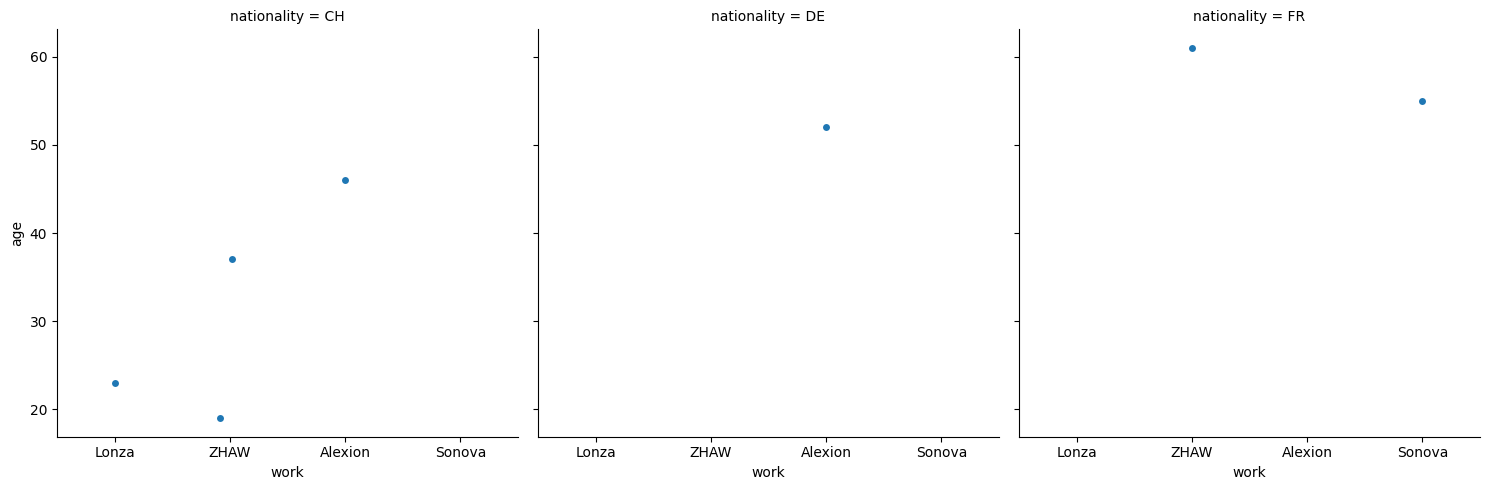

In [93]:
import seaborn as sns

sns.catplot(x="work",
            y="age",
            # hue="other_dimension",
            col="nationality",
            data=df)


## Example from the "Titanic" dataset

seaborn also contains datasets which you can use to practice data visualization and machine learning algorythm.

to get a list of datasets available, execute the cell below:

In [94]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [95]:
titanic = sns.load_dataset("titanic")

🥦 <font color='red'>TODO</font>: get the size, data types and basic statistics about the titanic dataset

In [105]:
# add your code here
print('size',   titanic.size )
print('shape',   titanic.shape )
print('types',  titanic.dtypes )
titanic.info()
titanic.describe()

size 13365
shape (891, 15)
types survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who       

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Example of data visualization using seaborn cat(egory) plot

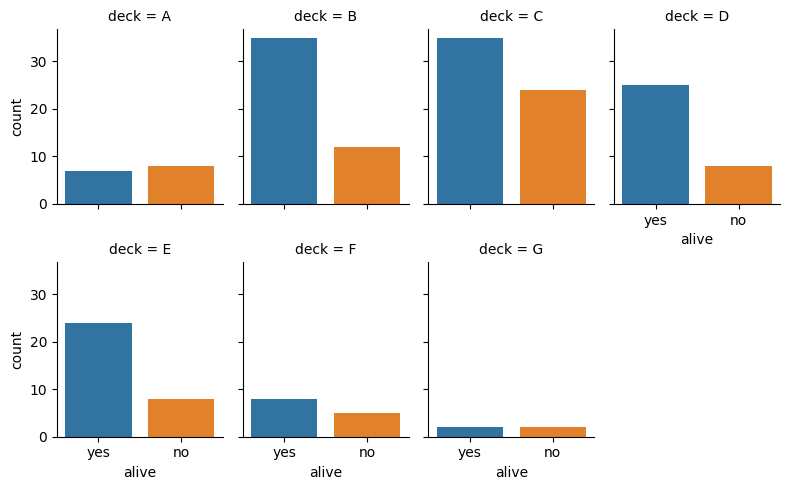

In [103]:
sns.catplot(x="alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=2.5, aspect=.8);

🥦 <font color='red'>TODO</font>: Visualize the count of passengers who survive on the titanic based on the deck they were on and their gender.

🌶️ <font color='red'>TODO</font>: Explore other seaborn datasets and try several visualizations using seaborn

# Appendix (optional content)

## Using Google colab

Colab is a free Python environment developed by Google and available in your browser.

It is similar to your Codespace environment with some differences. For once, you need to have a google account to use google colab.

Once you passed this hurdle and if you are also using google drive, then colab.google.com can be an very useful way to write your Python code. 

One of the benefit of Colab is that the environment is already setup and already includes Pandas, Matplotlib, Seaborn, etc. but also more advanved packages used for machine learning such as sk-learn or Tensor Flow.


<img src="https://nico.nexgate.ch/images/colab.png" width='80%' alt="excel" />




🌶️🌶️ <font color='red'>TODO</font>: This section is optional. If you want to run your Python with Google colab, you need to setup a Google account, then you need to put your files on your google drive.

In [ ]:
!pwd

In [ ]:
!ls -la  
# if you are using a Windows laptop, use dir instead of ls -la

By default, your google colab notebook does not have access to your google drive. If you want to use data on your google drive, you need to mount the drive - in other words, you need to connect it to your notebook so that you can see your file.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

once your google drive is mounted, you can browse its content to find your data files, load them in pandas dataframe etc.

In [ ]:
!ls '/content/gdrive/MyDrive/Colab Notebooks/ZHAW/Data/iris/'

In [ ]:
# replace '/Colab_Notebooks/ZHAW...' by your own path to a data file on your Google drive
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ZHAW/Data/iris/iris_questionnaire_cooking_practices.csv',delimiter=';')

In [ ]:
df.head(3)